# Girdle beetle

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
data = pd.read_csv("FinalData.csv")

In [4]:
data.head()

,Airtemp,Rel.Hum,Rainfall,Leaf_wetness_Hours,Radiation,Bacterial leaf spot,Alternariablight,Powdery mildew,Rhizopusrot,Downy mildew,Girdle beetle
0,25.7,76.0,0.0,0.42,3.0,0,0,0,0,0,1
1,24.1,83.0,0.2,14.33,186.0,1,0,0,1,0,0
2,24.5,83.0,0.6,11.33,196.0,1,0,0,1,0,0
3,23.4,85.0,1.2,11.42,131.0,0,0,0,1,0,0
4,25.0,78.0,0.0,8.50,259.0,0,0,0,0,0,1


In [5]:

features = ['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours','Radiation']

# Splitting data into features (X) and target variable (y)
X = data[features]
# y = data['Bacterial leaf spot']
y = data['Girdle beetle']

In [8]:
# X,y

In [9]:
data['Girdle beetle'].value_counts()

Girdle beetle
0    2429
1    1091
Name: count, dtype: int64

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2816, 5)
X_test shape: (704, 5)
y_train shape: (2816,)
y_test shape: (704,)


In [12]:
model = SVC(kernel='linear')

In [13]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
predictions = model.predict(X_test)

In [15]:
print(predictions)

[0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1
 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 0 0 

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.765625


In [17]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [18]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7581676136363636


In [19]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [20]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.765625


In [21]:
model.score(X_train, y_train)

0.7581676136363636

In [22]:
model.score(X_test, y_test)

0.765625

In [23]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)

# print(y_test.shape, predictions.shape)

Confusion Matrix:
[[384 102]
 [ 63 155]]


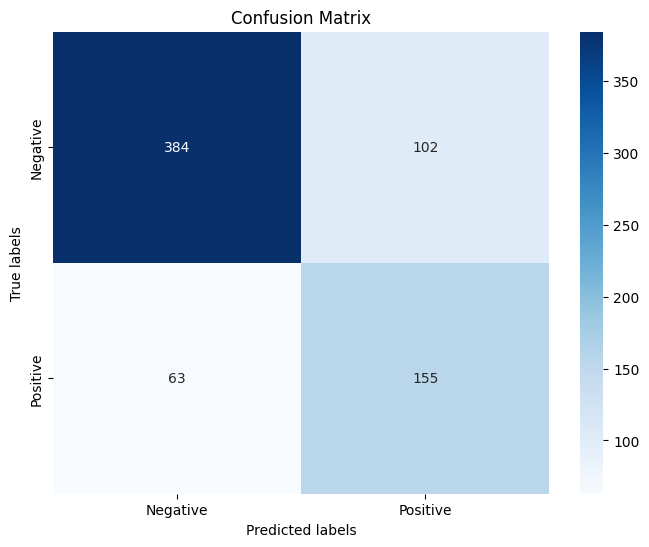

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Define the labels
labels = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       486
           1       0.60      0.71      0.65       218

    accuracy                           0.77       704
   macro avg       0.73      0.75      0.74       704
weighted avg       0.78      0.77      0.77       704



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)




Precision: 0.7798039132478519
Recall: 0.765625
F1-score: 0.7703481976645793


In [27]:
import pickle

# Assuming 'model' is your trained model object
with open('Girdlebeetle.pkl', 'wb') as f:
    pickle.dump(model, f)